In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

diabetes_df = pd.read_csv("../week_13/diabetes.csv")

diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
from statsmodels.formula.api import logit

#no interaction
age_gl_no_int = logit('Outcome ~ Age + Glucose', data=diabetes_df).fit()
print(age_gl_no_int.params)

# Outcome = -5.9 + 0.02*Age + .04*Glucose

Optimization terminated successfully.
         Current function value: 0.519116
         Iterations 6
Intercept   -5.912449
Age          0.024778
Glucose      0.035644
dtype: float64


In [4]:
#interaction
age_gl_int = logit('Outcome ~ Age * Glucose', data=diabetes_df).fit()
print(age_gl_int.params)
# Outcome = -9.5 + 0.12*Age + 0.06*Glucose - 0.0008*Age*Glucose

Optimization terminated successfully.
         Current function value: 0.513197
         Iterations 6
Intercept     -9.510659
Age            0.126536
Glucose        0.063854
Age:Glucose   -0.000789
dtype: float64


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [6]:
#Simplest logistic regression approach
regression = LogisticRegression(random_state=0).fit(X_train, y_train)

y_predicted = regression.predict(X_test)

In [7]:
regression.score(X_test, y_test)

0.7077922077922078

In [8]:
#we see a huge improvement in performance
#but, we basically cheated by getting performance based on
# data we trained the model on
regression.score(X_train, y_train)

0.7915309446254072

In [9]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



In [10]:
conf_matrix = confusion_matrix(y_test, y_predicted)

(<Figure size 432x288 with 3 Axes>,
 OrderedDict([(('0', '0'), (0.0, 0.0, 0.6461200491051238, 0.8172757475083056)),
              (('0', '1'),
               (0.0,
                0.8205980066445181,
                0.6461200491051238,
                0.17940199335548176)),
              (('1', '0'),
               (0.6510951734832332,
                0.0,
                0.34890482651676685,
                0.4983388704318937)),
              (('1', '1'),
               (0.6510951734832332,
                0.5016611295681063,
                0.34890482651676685,
                0.4983388704318937))]))

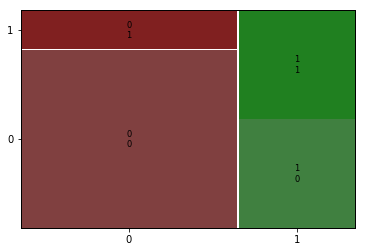

In [11]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(conf_matrix)